In [29]:
# Import libraries
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Create a list of dictionaries representing the data
df1 = [
    {"OutlookTemp(F)": 75, "Humidity(%)": 70, "Windy?": True, "Class": "Play"},
    {"OutlookTemp(F)": 80, "Humidity(%)": 90, "Windy?": True, "Class": "Don't Play"},
    {"OutlookTemp(F)": 85, "Humidity(%)": 85, "False": False, "Class": "Don't Play"},
    {"OutlookTemp(F)": 72, "Humidity(%)": 95, "Windy?": False, "Class": "Don't Play"},
    {"OutlookTemp(F)": 69, "Humidity(%)": 70, "Windy?": False, "Class": "Play"},
    {"OutlookTemp(F)": 72, "Humidity(%)": 90, "Windy?": True, "Class": "Play"},
    {"OutlookTemp(F)": 83, "Humidity(%)": 78, "Windy?": False, "Class": "Play"},
    {"OutlookTemp(F)": 64, "Humidity(%)": 65, "Windy?": True, "Class": "Play"},
    {"OutlookTemp(F)": 81, "Humidity(%)": 75, "Windy?": False, "Class": "Play"},
    {"OutlookTemp(F)": 71, "Humidity(%)": 80, "Windy?": True, "Class": "Don't Play"},
    {"OutlookTemp(F)": 65, "Humidity(%)": 70, "Windy?": True, "Class": "Don't Play"},
    {"OutlookTemp(F)": 75, "Humidity(%)": 80, "Windy?": False, "Class": "Play"},
    {"OutlookTemp(F)": 68, "Humidity(%)": 80, "Windy?": False, "Class": "Play"},
    {"OutlookTemp(F)": 70, "Humidity(%)": 96, "Windy?": False, "Class": "Don't Play"}
]
df1

[{'OutlookTemp(F)': 75, 'Humidity(%)': 70, 'Windy?': True, 'Class': 'Play'},
 {'OutlookTemp(F)': 80,
  'Humidity(%)': 90,
  'Windy?': True,
  'Class': "Don't Play"},
 {'OutlookTemp(F)': 85,
  'Humidity(%)': 85,
  'False': False,
  'Class': "Don't Play"},
 {'OutlookTemp(F)': 72,
  'Humidity(%)': 95,
  'Windy?': False,
  'Class': "Don't Play"},
 {'OutlookTemp(F)': 69, 'Humidity(%)': 70, 'Windy?': False, 'Class': 'Play'},
 {'OutlookTemp(F)': 72, 'Humidity(%)': 90, 'Windy?': True, 'Class': 'Play'},
 {'OutlookTemp(F)': 83, 'Humidity(%)': 78, 'Windy?': False, 'Class': 'Play'},
 {'OutlookTemp(F)': 64, 'Humidity(%)': 65, 'Windy?': True, 'Class': 'Play'},
 {'OutlookTemp(F)': 81, 'Humidity(%)': 75, 'Windy?': False, 'Class': 'Play'},
 {'OutlookTemp(F)': 71,
  'Humidity(%)': 80,
  'Windy?': True,
  'Class': "Don't Play"},
 {'OutlookTemp(F)': 65,
  'Humidity(%)': 70,
  'Windy?': True,
  'Class': "Don't Play"},
 {'OutlookTemp(F)': 75, 'Humidity(%)': 80, 'Windy?': False, 'Class': 'Play'},
 {'OutlookT

In [6]:
# Create a pandas DataFrame from the data
df = pd.DataFrame(df1)
df

,OutlookTemp(F),Humidity(%),Windy?,Class,False
0,75,70,True,Play,NaN
1,80,90,True,Don't Play,NaN
2,85,85,NaN,Don't Play,False
3,72,95,False,Don't Play,NaN
4,69,70,False,Play,NaN
5,72,90,True,Play,NaN
6,83,78,False,Play,NaN
7,64,65,True,Play,NaN
8,81,75,False,Play,NaN
9,71,80,True,Don't Play,NaN


In [7]:
# Separate features (X) and target variable (y)
X = df[["OutlookTemp(F)", "Humidity(%)", "Windy?"]]  # Features
y = df["Class"]  # Target variable

In [8]:
# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the model
clf.fit(X, y)

DecisionTreeClassifier()

In [14]:
# Compute entropy for the entire dataset
total_instances = len(df)
play_instances = len(df[df['Class'] == 'Play'])
dont_play_instances = len(df[df['Class'] == "Don't Play"])

entropy_total = -(play_instances/total_instances) * np.log2(play_instances/total_instances) \
                - (dont_play_instances/total_instances) * np.log2(dont_play_instances/total_instances)

In [15]:
# Compute entropy for the Humidity attribute (using the specified threshold of 75)
humidity_low_instances = len(df[df['Humidity(%)'] <= 75])
humidity_high_instances = len(df[df['Humidity(%)'] > 75])

In [16]:
# Calculate entropy for humidity <= 75
humidity_low_play_instances = len(df[(df['Humidity(%)'] <= 75) & (df['Class'] == 'Play')])
humidity_low_dont_play_instances = len(df[(df['Humidity(%)'] <= 75) & (df['Class'] == "Don't Play")])

entropy_humidity_low = -(humidity_low_play_instances/humidity_low_instances) * np.log2(humidity_low_play_instances/humidity_low_instances) \
                       - (humidity_low_dont_play_instances/humidity_low_instances) * np.log2(humidity_low_dont_play_instances/humidity_low_instances) \
                       if humidity_low_instances > 0 else 0

In [17]:
# Calculate entropy for humidity > 75
humidity_high_play_instances = len(df[(df['Humidity(%)'] > 75) & (df['Class'] == 'Play')])
humidity_high_dont_play_instances = len(df[(df['Humidity(%)'] > 75) & (df['Class'] == "Don't Play")])

entropy_humidity_high = -(humidity_high_play_instances/humidity_high_instances) * np.log2(humidity_high_play_instances/humidity_high_instances) \
                        - (humidity_high_dont_play_instances/humidity_high_instances) * np.log2(humidity_high_dont_play_instances/humidity_high_instances) \
                        if humidity_high_instances > 0 else 0

In [18]:
# Calculate information gain for Humidity attribute
information_gain_humidity = entropy_total - (humidity_low_instances/total_instances) * entropy_humidity_low \
                            - (humidity_high_instances/total_instances) * entropy_humidity_high

print(f"Entropy for Humidity: {entropy_humidity_low:.4f} (Humidity <= 75), {entropy_humidity_high:.4f} (Humidity > 75)")
print(f"Information Gain for Humidity: {information_gain_humidity:.4f}")

Entropy for Humidity: 0.7219 (Humidity <= 75), 0.9911 (Humidity > 75)
Information Gain for Humidity: 0.0903


In [19]:
# Compute entropy for the Outlook attribute
# Assuming binary split: Outlook = Sunny / Outlook = Not Sunny

outlook_sunny_instances = len(df[df['OutlookTemp(F)'] <= 75])
outlook_not_sunny_instances = len(df[df['OutlookTemp(F)'] > 75])

In [20]:
# Calculate entropy for Outlook = Sunny
outlook_sunny_play_instances = len(df[(df['OutlookTemp(F)'] <= 75) & (df['Class'] == 'Play')])
outlook_sunny_dont_play_instances = len(df[(df['OutlookTemp(F)'] <= 75) & (df['Class'] == "Don't Play")])

entropy_outlook_sunny = -(outlook_sunny_play_instances/outlook_sunny_instances) * np.log2(outlook_sunny_play_instances/outlook_sunny_instances) \
                        - (outlook_sunny_dont_play_instances/outlook_sunny_instances) * np.log2(outlook_sunny_dont_play_instances/outlook_sunny_instances) \
                        if outlook_sunny_instances > 0 else 0

In [21]:
# Calculate entropy for Outlook = Not Sunny
outlook_not_sunny_play_instances = len(df[(df['OutlookTemp(F)'] > 75) & (df['Class'] == 'Play')])
outlook_not_sunny_dont_play_instances = len(df[(df['OutlookTemp(F)'] > 75) & (df['Class'] == "Don't Play")])

entropy_outlook_not_sunny = -(outlook_not_sunny_play_instances/outlook_not_sunny_instances) * np.log2(outlook_not_sunny_play_instances/outlook_not_sunny_instances) \
                            - (outlook_not_sunny_dont_play_instances/outlook_not_sunny_instances) * np.log2(outlook_not_sunny_dont_play_instances/outlook_not_sunny_instances) \
                            if outlook_not_sunny_instances > 0 else 0

In [22]:
# Calculate information gain for Outlook attribute
information_gain_outlook = entropy_total - (outlook_sunny_instances/total_instances) * entropy_outlook_sunny \
                           - (outlook_not_sunny_instances/total_instances) * entropy_outlook_not_sunny

print(f"Entropy for Outlook: {entropy_outlook_sunny:.4f} (Outlook = Sunny), {entropy_outlook_not_sunny:.4f} (Outlook = Not Sunny)")
print(f"Information Gain for Outlook: {information_gain_outlook:.4f}")

Entropy for Outlook: 0.9710 (Outlook = Sunny), 1.0000 (Outlook = Not Sunny)
Information Gain for Outlook: 0.0060


In [23]:
# Compute intrinsic information for Humidity attribute
intrinsic_info_humidity = -(humidity_low_instances/total_instances) * np.log2(humidity_low_instances/total_instances) \
                          - (humidity_high_instances/total_instances) * np.log2(humidity_high_instances/total_instances)



In [24]:
# Calculate gain ratio for Humidity attribute
gain_ratio_humidity = information_gain_humidity / intrinsic_info_humidity if intrinsic_info_humidity != 0 else 0

print(f"Information Gain for Humidity: {information_gain_humidity:.4f}")
print(f"Intrinsic Information for Humidity: {intrinsic_info_humidity:.4f}")
print(f"Gain Ratio for Humidity: {gain_ratio_humidity:.4f}")

Information Gain for Humidity: 0.0903
Intrinsic Information for Humidity: 0.9403
Gain Ratio for Humidity: 0.0960


|--- Humidity(%) <= 82.50
|   |--- Windy? <= 0.50
|   |   |--- class: Play
|   |--- Windy? >  0.50
|   |   |--- Humidity(%) <= 67.50
|   |   |   |--- class: Play
|   |   |--- Humidity(%) >  67.50
|   |   |   |--- OutlookTemp(F) <= 73.00
|   |   |   |   |--- class: Don't Play
|   |   |   |--- OutlookTemp(F) >  73.00
|   |   |   |   |--- class: Play
|--- Humidity(%) >  82.50
|   |--- Windy? <= 0.50
|   |   |--- class: Don't Play
|   |--- Windy? >  0.50
|   |   |--- OutlookTemp(F) <= 76.00
|   |   |   |--- class: Play
|   |   |--- OutlookTemp(F) >  76.00
|   |   |   |--- class: Don't Play



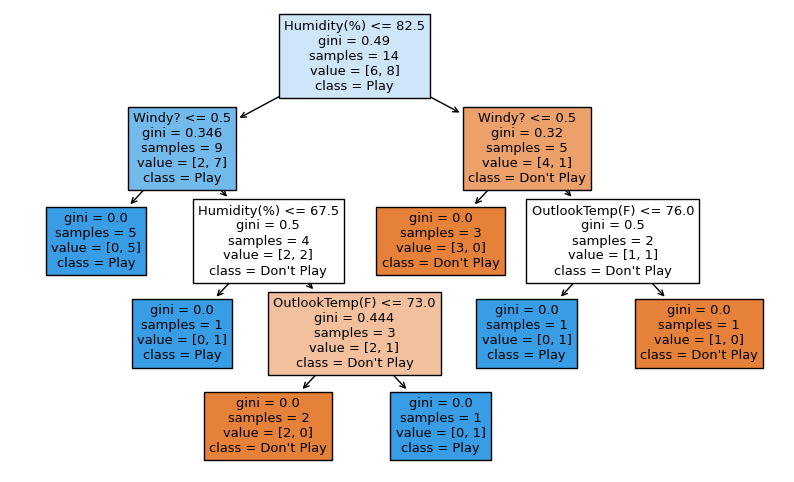

In [30]:
# Train the model
clf.fit(X, y)

# Export the decision tree to a text format
tree_text = export_text(clf, feature_names=["OutlookTemp(F)", "Humidity(%)", "Windy?"])

# Print the text representation of the decision tree
print(tree_text)

# Plot the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, filled=True, feature_names=["OutlookTemp(F)", "Humidity(%)", "Windy?"], class_names=["Don't Play", "Play"])
plt.show()